C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

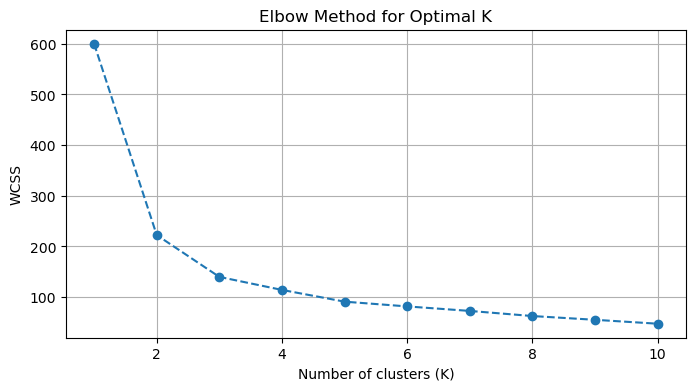

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


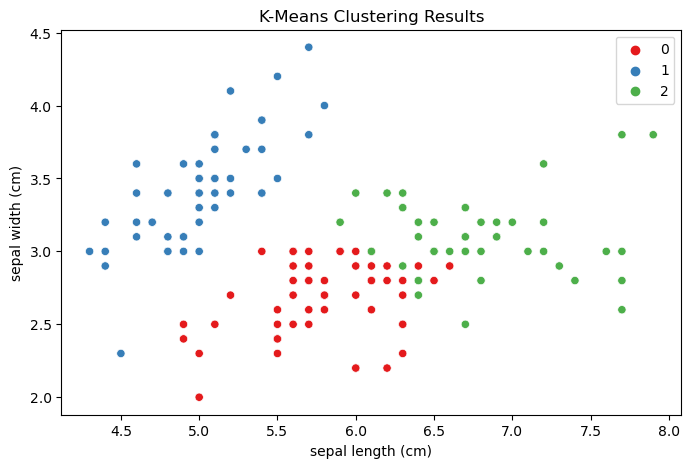

Silhouette Score: 0.45994823920518635


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


# Find the optimal number of clusters using Elbow Method
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()



# From elbow plot, suppose we choose k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)


# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Show first 5 rows of the result
print(df.head())



# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[iris.feature_names[0]],
                y=df[iris.feature_names[1]],
                hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clustering Results')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()


# Calculate silhouette score
score = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", score)


### **1. Library Imports**

Essential libraries for data manipulation, visualization, clustering, and evaluation are imported:
- `numpy` and `pandas` for data handling
- `matplotlib` and `seaborn` for visualization
- `KMeans` for clustering
- `StandardScaler` for normalization
- `silhouette_score` to evaluate clustering quality

---

### **2. Data Loading**

- The **Iris dataset** is loaded using `sklearn.datasets.load_iris()`. This dataset contains measurements of iris flowers: sepal length, sepal width, petal length, and petal width.
- It is converted to a DataFrame for easier manipulation and visualization.

---

### **3. Data Standardization**

- Since K-Means is sensitive to the scale of the data, the features are **standardized** using `StandardScaler`. This transforms each feature to have zero mean and unit variance, ensuring fair treatment during clustering.

---

### **4. Finding the Optimal Number of Clusters (Elbow Method)**

- The **Elbow Method** is used to determine the optimal number of clusters (K).
- For K ranging from 1 to 10, K-Means is applied and the **WCSS** (Within-Cluster Sum of Squares) is calculated and stored.
- A plot is drawn with K vs. WCSS. The "elbow point" (where the WCSS starts decreasing slowly) suggests a good K value.

---

### **5. Applying K-Means Clustering**

- Based on the elbow plot, **K=3** is chosen (known to match the 3 species in the Iris dataset).
- K-Means is applied with 3 clusters, and the predicted cluster labels are stored in a new column called `Cluster` in the DataFrame.

---

### **6. Visualization of Clusters**

- A **scatter plot** is created using the first two features (sepal length and width) to visualize the cluster distribution.
- Data points are colored based on their assigned cluster label, helping to interpret how the model has grouped them.

---

### **7. Cluster Quality Evaluation**

- The **Silhouette Score** is computed to evaluate how well each data point fits within its cluster. The score ranges from -1 to 1:
  - A score close to **1** indicates well-separated and dense clusters.
  - A score near **0** suggests overlapping clusters.
  - Negative scores imply incorrect clustering.

